# Lorenz System

The Lorenz system is a set of three coupled, first-order, nonlinear differential equations that were originally developed to model atmospheric convection. The equations are given by:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{align*}

where $x$, $y$, and $z$ are the system's state variables, and $\sigma$, $\rho$, and $\beta$ are parameters that affect the system's behavior.

In [7]:
from scipy.integrate import solve_ivp
import numpy as np

def lorenz_system(t, state, sigma, rho, beta):
    """
    Returns the derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Set parameters (classic chaotic regime)
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time span
t_span = (0, 40)  # from t=0 to t=40
t_eval = np.linspace(0, 40, 10000)  # points where you want solution

# Solve
solution = solve_ivp(lorenz_system, t_span, initial_state, 
                     args=(sigma, rho, beta), 
                     t_eval=t_eval, 
                     method='RK45')

x, y, z = solution.y
t = solution.t

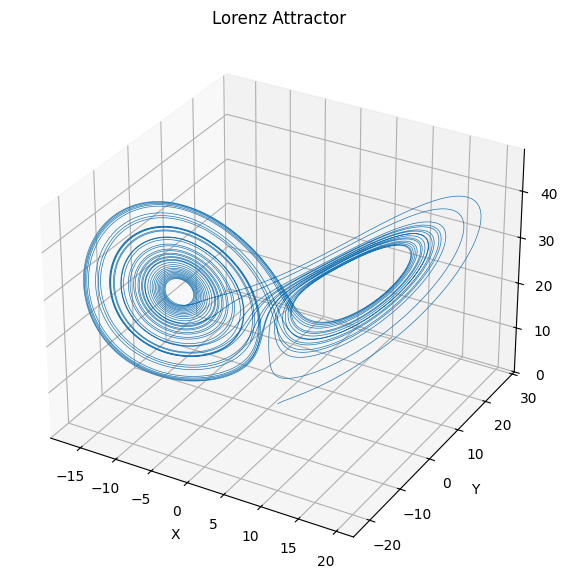

In [8]:
# make a plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Knots 

For some values of the parameters we get knots in the trajectories. For instance 

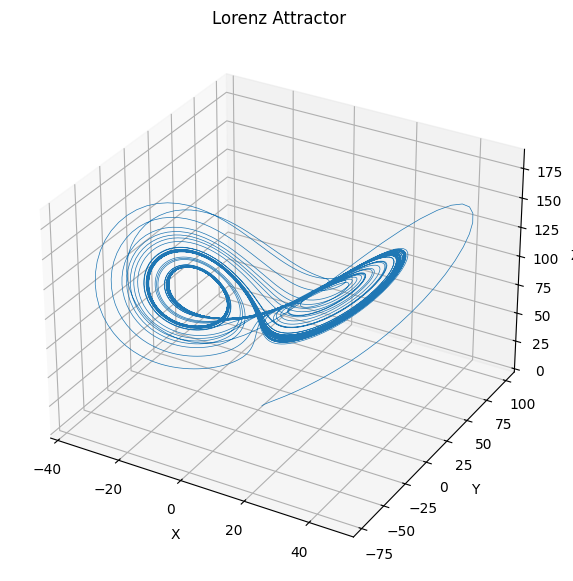

In [9]:
from scipy.integrate import solve_ivp
import numpy as np

def lorenz_system(t, state, sigma, rho, beta):
    """
    Returns the derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Set parameters (classic chaotic regime)
sigma = 10.0
rho = 99.96
beta = 8.0/3.0

# Initial conditions
initial_state = [1.0, 1.0, 1.0]

# Time span
t_span = (0, 40)  # from t=0 to t=40
t_eval = np.linspace(0, 40, 10000)  # points where you want solution

# Solve
solution = solve_ivp(lorenz_system, t_span, initial_state, 
                     args=(sigma, rho, beta), 
                     t_eval=t_eval, 
                     method='RK45')

x, y, z = solution.y
t = solution.t

# make a plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_title("Lorenz Attractor")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Chaos

For certain parameter values, the Lorenz system exhibits chaotic behavior, meaning that small differences in initial conditions can lead to vastly different outcomes over time. This sensitivity to initial conditions is a hallmark of chaotic systems.

The Lyapunov exponent is a measure of the average rate at which nearby trajectories in a dynamical system diverge or converge. A positive Lyapunov exponent indicates chaos, as it signifies that small perturbations grow exponentially over time. Specifically, in an equation 

$$ d(t) \approx d(0) e^{\lambda t} $$

where $d(t)$ is the distance between two trajectories at time $t$, $d(0)$ is their initial separation, and $\lambda$ is the Lyapunov exponent. If $\lambda > 0$, the system is chaotic.

In [4]:
def compute_lyapunov_exponent(sigma, rho, beta, n_iterations=1000, dt=0.01, d0=1e-8):
    """
    Compute the largest Lyapunov exponent for the Lorenz system.
    
    Parameters:
    -----------
    sigma, rho, beta : float
        Lorenz system parameters
    n_iterations : int
        Number of renormalization steps
    dt : float
        Time step between renormalizations
    d0 : float
        Initial separation distance
    """
    
    # Initial conditions for reference trajectory
    state1 = np.array([1.0, 1.0, 1.0])
    
    # Perturbed trajectory (slightly different initial condition)
    state2 = state1 + np.array([d0, 0, 0])
    
    lyapunov_sum = 0.0
    
    for i in range(n_iterations):
        # Evolve both trajectories
        sol1 = solve_ivp(lorenz_system, (0, dt), state1, 
                        args=(sigma, rho, beta), 
                        method='RK45', dense_output=True)
        sol2 = solve_ivp(lorenz_system, (0, dt), state2, 
                        args=(sigma, rho, beta), 
                        method='RK45', dense_output=True)
        
        # Get final states
        state1 = sol1.y[:, -1]
        state2 = sol2.y[:, -1]
        
        # Compute separation
        d = np.linalg.norm(state2 - state1)
        
        # Accumulate logarithm of stretching factor
        lyapunov_sum += np.log(d / d0)
        
        # Renormalize: reset perturbation to original size
        direction = (state2 - state1) / d  # unit vector
        state2 = state1 + d0 * direction
    
    # Average over time
    lyapunov_exponent = lyapunov_sum / (n_iterations * dt)
    
    return lyapunov_exponent

# Test with standard parameters
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

print("Computing Lyapunov exponent...")
lambda_exp = compute_lyapunov_exponent(sigma, rho, beta, n_iterations=2000, dt=0.1)
print(f"Lyapunov exponent: {lambda_exp:.4f}")
print(f"(Expected value ≈ 0.9 for standard parameters)")


Computing Lyapunov exponent...
Lyapunov exponent: 0.8583
(Expected value ≈ 0.9 for standard parameters)


In [5]:

print("Computing Lyapunov exponent...")
lambda_exp = compute_lyapunov_exponent(sigma, rho, beta, n_iterations=200000, dt=.1)
print(f"Lyapunov exponent: {lambda_exp:.4f}")
print(f"(Expected value ≈ 0.9 for standard parameters)")

Computing Lyapunov exponent...
Lyapunov exponent: 0.9060
(Expected value ≈ 0.9 for standard parameters)


In [6]:

print("Computing Lyapunov exponent...")
lambda_exp = compute_lyapunov_exponent(sigma, 60., beta, n_iterations=500000, dt=.1)
print(f"Lyapunov exponent: {lambda_exp:.4f}")
print(f"(Expected value ≈ 1.5 for these parameters)")

Computing Lyapunov exponent...
Lyapunov exponent: 1.3916
(Expected value ≈ 1.5 for these parameters)
